# k-Nearest Neighbor Klassifikator

Folgendes Diagram zeigt 2D Merkmalvektoren der Klassen "Zahlen" und "Buchstaben" in Form von Zahlen (1-5) und Buchstaben (a-f)


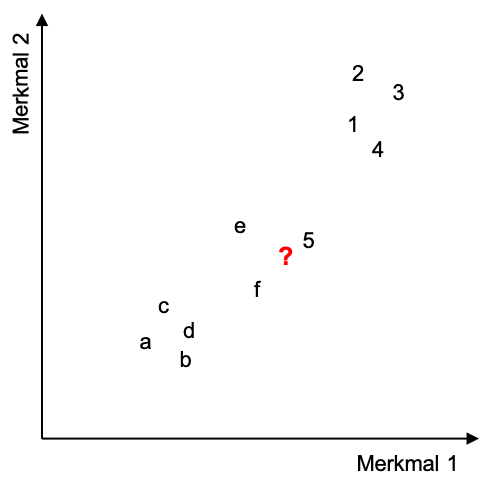

Als Distanzmaß wird der Euklidabstand verwendet.

a) Welche Klasse wird <font color='red'>?</font> bei einem 1-NN Klassifikator zugeweisen?

b) Welche Klasse wird <font color='red'>?</font> bei einem 3-NN Klassifikator zugeweisen?

c) Geben Sie an, wie sich im Falle des 3-NN Klassifikators eine Rückweisung implementieren lässt? Welchen Wert hätte <font color='red'>?</font> in diesem Fall? 

d) Beim kNN Klassifikator müssen die gesamten Trainingsdaten im Speicher gehalten werden. Zur Klassifikation müssen Distanzen für alle Trainingsbeispiele berechnet werden. <br>
  > d1) Wie könnte dieses "Effizienzproblem" gelöst werden? <br>
  > d2) Welche Nachteile hat die Methode aus d1? <br>

a) Es wird eine zahl zugewiesen

b) Es wird ein Buchstabe zugewiesen

c) 1: Rückweisung via distance-threshold - liegt ein Datenpunkt außerhalb der rejection distance wird er als outliar zurückgewiesen und spielt bei der Klassifikation keine Rolle
   2: Rückweisung via example-threshold - liegen bei einem bestimmten k gleich viele examples der zu klassifizierenden Klassen vor, wird die Entscheidung zurückgewiesen.
   
   Angenommen im Beispiel oben liegt der Datenpunkt e außerhalb der rejection distance; somit werden für die Klassifikation nur noch die examples 5 und f verwendet, was zu dem Problem führt dass das Programm keine harte Entscheidung mehr treffen kann da beide Klassen examples gleich verteilt sind;
   Somit müsste eine zweite, die example-threshold Rückweisung implementiert werden, welche unter einer bestimmten benchmark von examples einer Klasse nicht antwortet;
   In diesem Fall ist b=2 min für eine harte Entscheidung und da in dem Fall keine Klasse über 2 examples in der rejection distance vorliegen hat ist die Antwort des Programms "unknown". 
   Würde man die distance-rejection vernachlässigen und nur mit der example Rückweisung klassifizieren ist die Antwort "Letter".
   
d) 1: Dimensions-Reduktion
   2: Nachteil: Informationsverlust
   Alternativ: Klassifikator stratified auf einem sub-set des gesamten datasets trainieren

# Implementieren des kNN Klassifikators in Python




Implementieren Sie eine Klasse MyKNN, die einen kNN Klassifikator definieren soll. Als Abstandsmaß ist Euklid-Abstand zu implementieren. 

Verwenden Sie die Struktur wie in sklearn:
- Klassifikatoren werden als Klasse repraesentiert
- Es gibt eine fit()- und eine predict()-Methode

In [6]:
import numpy as np

class MyKNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        
        for i, x_test in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
            
            k_nearest_neighbors = np.argsort(distances)[:self.k]
            
            k_nearest_labels = self.y_train[k_nearest_neighbors]
            
            y_pred[i] = np.bincount(k_nearest_labels).argmax()
        
        return y_pred

## Testen Sie das Verfahren auf Datensätzen Ihrer Wahl, z.B. 
- Iris-data
- Digit-data
- Wine-data
von sklearn

Zunächst Training = Test

In [7]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X=iris_dataset['data'][:,[0,1]] 

y=iris_dataset['target'] 

## Verwenden Sie den Visualisierungscode aus dem Vorlesungs-Notebook um Ihre implementierung zu testen.

(2464, 2)


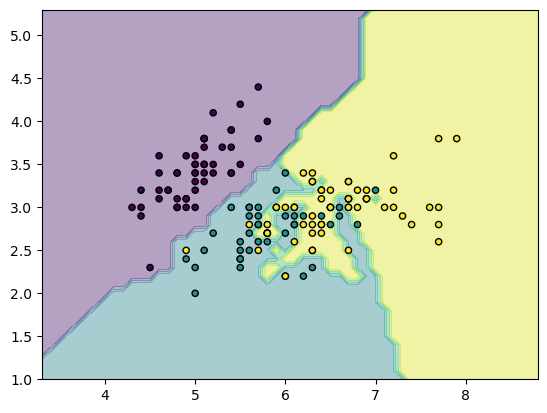

In [8]:
import matplotlib.pyplot as plt

knn = MyKNN(3)
knn.fit(X, y)

x1_min,x1_max = X[:,0].min() -1, X[:,0].max()+1  
x2_min,x2_max = X[:, 1].min() -1 , X[:,1].max()+1  

xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,0.1), np.arange(x2_min,x2_max,0.1))   

example_vecs = np.c_[xx1.ravel(), xx2.ravel()] 
                                          
print(example_vecs.shape) 

pred = knn.predict(example_vecs)
pred = pred.reshape(xx1.shape) 

plt.contourf(xx1, xx2, pred, alpha=0.4)

plt.scatter(X[:,0], X[:,1], c=iris_dataset.target, s=20, edgecolor='k')

plt.show()

## Bestimmen Sie die Güte Ihres Klassifikators und Testen Sie unterschiedliche Werte für k.

In [13]:
from sklearn import metrics
import sklearn

knn_1 = MyKNN(1)
knn_2 = MyKNN(3)
knn_3 = MyKNN(10)

knn_1.fit(X, y)
knn_2.fit(X, y)
knn_3.fit(X, y)


y_pred_1 = knn_1.predict(X)
y_pred_2 = knn_2.predict(X)
y_pred_3 = knn_3.predict(X)

print(f"Accuracy with k=1: {sklearn.metrics.accuracy_score(y, y_pred_1)}, Accuracy with k=3: {sklearn.metrics.accuracy_score(y, y_pred_2)}, Accuracy with k=10: {sklearn.metrics.accuracy_score(y, y_pred_3)}")

Accuracy with k=1: 0.92, Accuracy with k=3: 0.86, Accuracy with k=10: 0.8133333333333334


In [14]:
eval = sklearn.metrics.classification_report(y, y_pred_2)
print(eval)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.84      0.72      0.77        50
           2       0.75      0.86      0.80        50

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



In [19]:
conf_mat=sklearn.metrics.confusion_matrix(y, y_pred_2)
print(conf_mat)

[[50  0  0]
 [ 0 36 14]
 [ 0  7 43]]


Interpretation: Setosa wird zu 100% erkannt (recall) und weißt dem actual label Setosa keine anderen Blumen zu (precision).

Versicolor hat niedrigeren recall als precision dh es liegen mehr false negatives vor dh es wurden Blumen die vom actual label versicolor sind schlichtweg nicht erkannt.

Virginica hat niedrigere precision als recall dh es liegen mehr false positives vor dh es wurden Blumen (versicolor) als Virginica gelabelt die gar keine sind.

## Zerlegen Sie die Daten in ein Training- und Testset und testen Sie erneut.

Hold-out non stratified, test size 0.25, random state 42

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'][:, [0,1]], iris_dataset['target'], test_size=0.25, random_state=42)

knn_split_1 = MyKNN(1)
knn_split_2 = MyKNN(3)
knn_split_3 = MyKNN(10)

knn_split_1.fit(X_train, y_train)
knn_split_2.fit(X_train, y_train)
knn_split_3.fit(X_train, y_train)

y_pred_split_1 = knn_split_1.predict(X_test)
y_pred_split_2 = knn_split_2.predict(X_test)
y_pred_split_3 = knn_split_3.predict(X_test)

print(f"Accuracy with k=1: {sklearn.metrics.accuracy_score(y_test, y_pred_split_1)}, Accuracy with k=3: {sklearn.metrics.accuracy_score(y_test, y_pred_split_2)}, Accuracy with k=10: {sklearn.metrics.accuracy_score(y_test, y_pred_split_3)}")

Accuracy with k=1: 0.7631578947368421, Accuracy with k=3: 0.7631578947368421, Accuracy with k=10: 0.7894736842105263


In [21]:
eval_split = sklearn.metrics.classification_report(y_test, y_pred_split_1)
print(eval_split)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.60      0.55      0.57        11
           2       0.62      0.67      0.64        12

    accuracy                           0.76        38
   macro avg       0.74      0.74      0.74        38
weighted avg       0.76      0.76      0.76        38



In [22]:
conf_mat_split=sklearn.metrics.confusion_matrix(y_test, y_pred_split_1)
print(conf_mat_split)

[[15  0  0]
 [ 0  6  5]
 [ 0  4  8]]


Interpreation: Setosa wird perfekt klassifiziert
    Versicolor extrem niedriger recall - 45% werden gar nicht erst erkannt
    Virginica niedrige precision - 38% werden als Virginica klassifiziert die es nicht sind

## Verwenden Sie ein Validierungsset zur Bestimmung eines geeigneten Parameters k

Hold-out non stratified, test size 0.25, random state 42

In [23]:
X_train_dev, X_test, y_train_dev, y_test = train_test_split(iris_dataset['data'][:, [0,1]], iris_dataset['target'], test_size=0.25, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

k_values = np.arange(1, 16, 1)
best_k = 0
best_score = 0

for k in k_values:
    knn = MyKNN(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_dev)
    score = sklearn.metrics.accuracy_score(y_dev, y_pred)
    print(f"k={k}: {score} accuracy")
    if score > best_score:
        best_score = score
        best_k = k
        
knn = MyKNN(best_k)
knn.fit(X_train_dev, y_train_dev)

y_pred = knn.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of model with optimal k={best_k}: {score}")


k=1: 0.5714285714285714 accuracy
k=2: 0.7142857142857143 accuracy
k=3: 0.75 accuracy
k=4: 0.7142857142857143 accuracy
k=5: 0.6428571428571429 accuracy
k=6: 0.6785714285714286 accuracy
k=7: 0.6785714285714286 accuracy
k=8: 0.6785714285714286 accuracy
k=9: 0.6428571428571429 accuracy
k=10: 0.7142857142857143 accuracy
k=11: 0.7142857142857143 accuracy
k=12: 0.75 accuracy
k=13: 0.7142857142857143 accuracy
k=14: 0.7142857142857143 accuracy
k=15: 0.75 accuracy
Accuracy of model with optimal k=3: 0.7631578947368421


In [24]:
eval = sklearn.metrics.classification_report(y_test, y_pred)
print(eval)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.57      0.73      0.64        11
           2       0.67      0.50      0.57        12

    accuracy                           0.76        38
   macro avg       0.75      0.74      0.74        38
weighted avg       0.77      0.76      0.76        38



In [25]:
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)

[[15  0  0]
 [ 0  8  3]
 [ 0  6  6]]


Interpreation: Setosa wird perfekt klassifiziert
    Versicolor extrem niedrige precision - 43% werden als Virginica klassifiziert die es nicht sind
    Virginica extrem niedriger recall - 50% werden gar nicht erst erkannt

## Verwenden Sie eine Kreuzvalidierung zur Bestimmung von k



Stratified cross validation, 10 splits, random state 42

In [36]:
from sklearn.model_selection import StratifiedKFold

X_train, y_train = iris_dataset['data'][:,[0,1]], iris_dataset['target']

k_values = np.arange(1, 16, 1)
best_k = 0
best_acc = 0

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for k in k_values:
    accuracies = []
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val = X_train[train_index], X_train[val_index] 
        y_train_fold, y_val = y_train[train_index], y_train[val_index] 
        
        knn = MyKNN(k)
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_val)
        accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
        
    avg_accuracy = np.mean(accuracies)
    if avg_accuracy > best_acc:
        best_acc = avg_accuracy
        best_k = k
        
knn = MyKNN(best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

score = sklearn.metrics.accuracy_score(y_train, y_pred)
print(f"Accuracy of model with optimal k={best_k}: {score}")       


Accuracy of model with optimal k=9: 0.8266666666666667


In [37]:
eval = sklearn.metrics.classification_report(y_train, y_pred)
print(eval)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.76      0.75        50
           2       0.75      0.72      0.73        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



Interpretation: Wenn mit StratKFold trainiert, k=9 am besten und generell bessere Performance als non strat Hold-out